# Text Analysis

**About**: Process to analyze text data to better understand what is being said and the meaning behind it. (Part of NLP - Natural Language Processing)

**NLP**: Subfield of AI where computers process and understand human language. Input may be written or spoken words for the computer to process.

We have a wide range of what we can analyze with text analysis (word Frequency, Sentiments(+ve or -ve), Common topics)

**Natural Language Toolkit (NLTK) Package**: An industry standard to perform natural language processing. 

**Why Analyze Text Data**: *Text Data Widely used in internet and daily life; Leveraging analysis can help us better understand human behavior; Provide Language Based Solutions and learn more about text products such as novels and blogs*

**NLP Applications**: Translators Between 2 languages; Spell Checker on a text application; Virtual Assistant Device on your Computer; Spam Filter

## Text Analysis on Great Expectations Novel

Lets imagine that we are trying to find a new novel to read for the book club we host. We want to gather an overall understanding of what this book is about, what it commonly talks about, and if it generally has a positive or negative tone to it. Book to be analyzed ***`Great Expectations`*** by ***`Charles Dickens`***

To obtain this novel, to evaluate it we will use **Project Gutenberg** `https://www.gutenberg.org/` website containing over 70,000 eBooks that are free to use and no subscription needed.

### How to pull text data

In [1]:
#Bring in text file with our novel
textfile = open('great_expectations.txt', 'r', encoding = "utf8")
great_expect = textfile.read()

print(great_expect)

﻿The Project Gutenberg eBook of Great Expectations, by Charles Dickens

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Great Expectations

Author: Charles Dickens

Release Date: July, 1998 [eBook #1400]
[Most recently updated: April 27, 2020]

Language: English

Character set encoding: UTF-8

Produced by: An Anonymous Volunteer and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK GREAT EXPECTATIONS ***

[Illustration]




Great Expectations

[1867 Edition]

by Charles Dickens


Contents

 Chapter I.
 Chapter II.
 Chapter III.
 Chapter IV.
 Chapter V.
 Chapter VI.
 Chapter VII.
 Chapt

In [2]:
#Import libraries
%pip install nltk
%pip install gensim
%pip install wordcloud

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

import pandas as pd
from PIL import Image
import numpy as np
import random
import re
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: joblib in c:\users\msagu\anaconda3\envs\learn-env\lib\site-packages (from nltk) (0.17.0)

Note: you may need to restart the kernel to use updated packages.



In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msagu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msagu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\msagu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\msagu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### How to clean text data
Many times when you bring in text data to analyze, it is very messy. It may contain misspelled words, words you dont want to analyze like the and and, or contains texts like chapter numbers that dont provide you value. We shall analyze three different ways of cleaning text data for our analysis.

In [4]:
#Lowercase words for word cloud
# this will lowercase all texts to make sure a capital 'soon' is the same as lowercase 'soon'
word_cloud_text = great_expect.lower()

#Remove numbers and alphanumeric words we don't need for word cloud
word_cloud_text = re.sub("[^a-zA-Z0-9]", " ", word_cloud_text)

In [5]:
#Tokenize the data to split it into words
#Tokenize text data to analyze the frequency of different words
tokens = word_tokenize(word_cloud_text)

#Remove stopwords
#Stopwords are usually not helpful in analyzing text data coz they are words with minimal meaning (the, and, is)
tokens = (word for word in tokens if word not in stopwords.words('english'))

#Remove short words less than 3 letters in length
#Not required but mostly one or two letter words are not very insightful for text analysis (disagree she,he can speak to topic)
tokens = (word for word in tokens if len(word) >= 3)

In [6]:
#Data cleaning to split data into sentences
#Essentially what this code does it takes alphabets, prefixes, suffixes to essentially determine what makes end 
# of a sentense 
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|edu|me)"
digits = "([0-9])"

# This part goes thru each piece and figures out where it needs to replace these different items to make it clear to python
#exactly where the sentense is going to end and saves results into a pandas dataframe
text = " " + great_expect + "  "
text = text.replace("\n"," ")
text = re.sub(prefixes,"\\1<prd>",text)
text = re.sub(websites,"<prd>\\1",text)
text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
if "..." in text: text = text.replace("...","<prd><prd><prd>")
if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
if "”" in text: text = text.replace(".”","”.")
if "\"" in text: text = text.replace(".\"","\".")
if "!" in text: text = text.replace("!\"","\"!")
if "?" in text: text = text.replace("?\"","\"?")
text = text.replace(".",".<stop>")
text = text.replace("?","?<stop>")
text = text.replace("!","!<stop>")
text = text.replace("<prd>",".")
sentences = text.split("<stop>")
sentences = [s.strip() for s in sentences]
sentences = pd.DataFrame(sentences)
sentences.columns = ['sentence']

In [7]:
#Print out sentences variable
print(len(sentences))
print(sentences.head(10))

10038
                                            sentence
0  ﻿The Project Gutenberg eBook of Great Expectat...
1  You may copy it, give it away or re-use it und...
2                                     gutenberg.org.
3  If you are not located in the United States, y...
4  Title: Great Expectations  Author: Charles Dic...
5                                       Chapter III.
6                                        Chapter IV.
7                            Chapter V.  Chapter VI.
8                                       Chapter VII.
9                                      Chapter VIII.


> We can see that we have 10,038 sentenses with first 10 entries split up into sentenses that has some headers irrelevant to us containing chapter numbers. We shall proceed to get rid of some of these rows in the beginning and introductory text and those chapter numbers since they will not be relevant for our analysis.

In [8]:
#Remove the first few rows of text that are irrelevant for analysis
sentences.drop(sentences.index[:59], inplace=True)
sentences = sentences.reset_index(drop=True)
sentences.head(10)

,sentence
0,[Illustration] Chapter I. My father’s fa...
1,"So, I called myself Pip, and came to be called..."
2,"I give Pirrip as my father’s family name, on t..."
3,"As I never saw my father or my mother, and nev..."
4,"The shape of the letters on my father’s, gave ..."
5,From the character and turn of the inscription...
6,"To five little stone lozenges, each about a fo..."
7,"Ours was the marsh country, down by the river,..."
8,My first most vivid and broad impression of th...
9,At such a time I found out for certain that th...


Its looks like we finaly have an appropriate dataframe and we are good to go minus maybe the top row having a little bit of extra text in it, but again, that should not be a huge deal when it comes to our analysis. So you are welcome to get rid of that extra row and a little bit of information at the beginning of it. Its totally ok to leave it.\
Our Data is now clean, next we proceed to text analysis.

### How to create a word cloud
**Word Cloud**: visual representation of popular words in a set of text data.

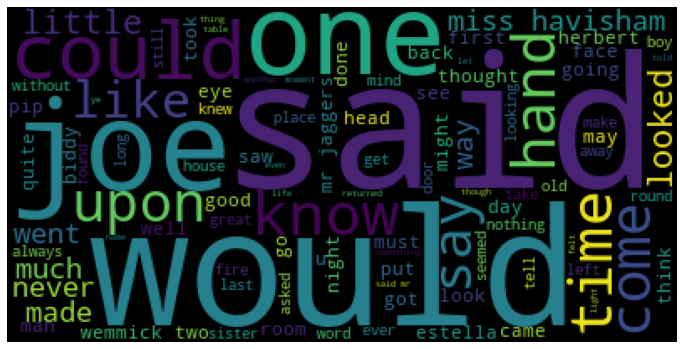

In [9]:
#Create word cloud with our text data

stopwords_wc = set(stopwords.words("english"))

wordcloud = WordCloud(max_words=100, stopwords=stopwords_wc, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We can see this word cloud has a variety of words in diffrent sizes and colors. This word cloud does not have a set of color scheme so the size of the words is what we will use to determine how frequently the word occurs or not. Common words in text data larger and vise versa 

### How to improve a word cloud

In [10]:
#Define gray_color_func function and mask variable for advanced word cloud
mask = np.array(Image.open("man_in_top_hat.jpeg"))
def gray_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

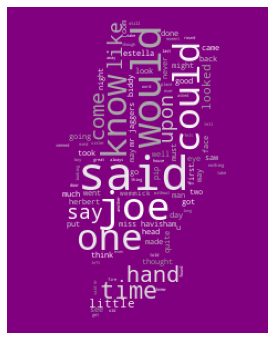

In [11]:
#Create advanced Word Cloud with our text data
wordcloud = WordCloud(background_color = "purple", max_words=100, mask=mask, color_func=gray_color_func, stopwords=stopwords_wc, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Word clouds are usually used to visually see popular words in a set of text data. But it could be difficult to see what words there are and exactly how frequently they occur in our novel, This is where word frequency analysis is useful. 
With word frequency analysis we can create word frequency distribution to see what words occur in the text and how frequently they appear in the text. 

### How to analyze word frequency

In [12]:
#Create word frequency distribution
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'said': 1349, 'joe': 747, 'would': 599, 'one': 514, 'could': 484, 'know': 392, 'miss': 383, 'come': 375, 'time': 374, 'little': 371, ...})

> In the output of our code, we can see the beginning of our word frequency distribution with the words and how many times they occur in the text. For example, we can see said occured 1349 times, come 375 times and so on. Unfortunately our output cuts off after the first few words. But lets say we wanted to clearly see the 50 most common words in our text data.

In [13]:
#View the 50 most common words in the text
fdist.most_common(50)

[('said', 1349),
 ('joe', 747),
 ('would', 599),
 ('one', 514),
 ('could', 484),
 ('know', 392),
 ('miss', 383),
 ('come', 375),
 ('time', 374),
 ('little', 371),
 ('upon', 368),
 ('pip', 341),
 ('like', 327),
 ('looked', 325),
 ('man', 321),
 ('havisham', 318),
 ('never', 315),
 ('old', 314),
 ('herbert', 313),
 ('much', 312),
 ('well', 304),
 ('say', 301),
 ('made', 300),
 ('went', 290),
 ('wemmick', 284),
 ('way', 278),
 ('see', 277),
 ('hand', 270),
 ('estella', 270),
 ('good', 257),
 ('two', 255),
 ('saw', 250),
 ('put', 246),
 ('back', 244),
 ('took', 243),
 ('jaggers', 242),
 ('think', 241),
 ('going', 241),
 ('got', 238),
 ('thought', 238),
 ('came', 235),
 ('head', 232),
 ('biddy', 231),
 ('might', 228),
 ('boy', 220),
 ('day', 219),
 ('night', 213),
 ('done', 212),
 ('dear', 209),
 ('must', 208)]

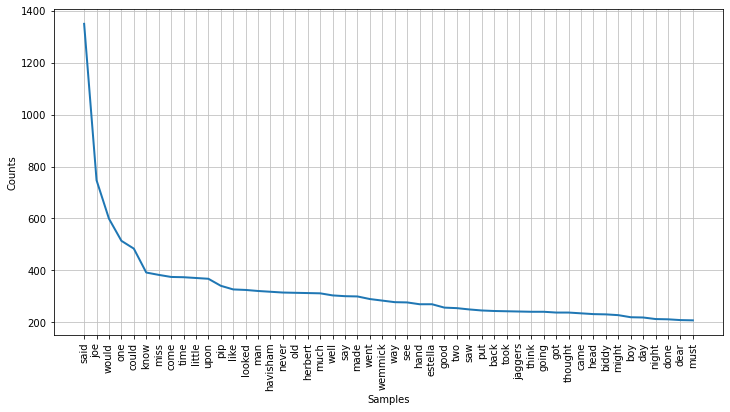

In [14]:
#Visualization of top 50 most common words in text
plt.figure(figsize=(12,6))
fdist.plot(50)
plt.show()

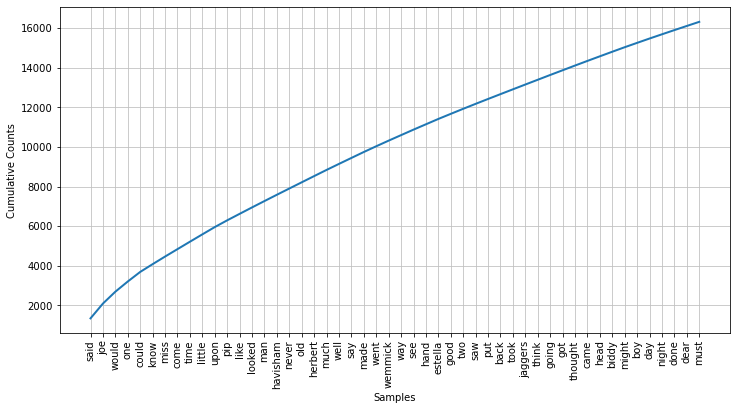

In [15]:
#Visualization of top 50 most common words in text cumulatively
plt.figure(figsize=(12,6))
fdist.plot(50, cumulative= True)
plt.show()

Next we shall proceed to perform a sentiment analysis, which means we will understand the emotions and whether they are positive, negative, or neutral within our novel. We will use the vader sentiment analysis algorithm to perform our analysis.

### How to perform Vader sentiment analysis

In [16]:
#Initialize Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [17]:
#Perfom Vader sentiment analysis
#Gathering the sentiment scores from our data
#Compound score: overall sentiment score for our text
#Range from -1 to 1 and its values 
sentences['compound'] = [analyzer.polarity_scores(x)['compound'] for x in sentences['sentence']]
sentences['neg'] = [analyzer.polarity_scores(x)['neg'] for x in sentences['sentence']]
sentences['neu'] = [analyzer.polarity_scores(x)['neu'] for x in sentences['sentence']]
sentences['pos'] = [analyzer.polarity_scores(x)['pos'] for x in sentences['sentence']]
sentences.head(10)

,sentence,compound,neg,neu,pos
0,[Illustration] Chapter I. My father’s fa...,0.0000,0.000,1.000,0.000
1,"So, I called myself Pip, and came to be called...",0.0000,0.000,1.000,0.000
2,"I give Pirrip as my father’s family name, on t...",0.0772,0.000,0.942,0.058
3,"As I never saw my father or my mother, and nev...",0.3612,0.000,0.941,0.059
4,"The shape of the letters on my father’s, gave ...",-0.1531,0.088,0.846,0.065
5,From the character and turn of the inscription...,-0.2960,0.087,0.913,0.000
6,"To five little stone lozenges, each about a fo...",0.4404,0.047,0.883,0.070
7,"Ours was the marsh country, down by the river,...",0.0000,0.000,1.000,0.000
8,My first most vivid and broad impression of th...,0.5423,0.000,0.836,0.164
9,At such a time I found out for certain that th...,-0.9325,0.124,0.848,0.028


> We can see for each sentence with our compound, negative, neutral and positive sentiment scores are. A compound score of -1 means the text is 100% negative, a score of 1 means it's 100% positive, and a score of 0 means its 100% neutral. Any values in between is somewhat positive or negative.

> The negative, neutral and positive columns range from 0 to 1, with 0 meaning its 100% not that sentiment and 1 meaning that its 100% that sentiment. And again any value between means that it is somewhat that sentiment.

> For instance, in the negative column, if you see a value of 0, that means it is definitely not negative, versus if you see a value of 1, its definitely negative.

> **The scores gathered above are really great to have but they're difficult to tell how many positive and negative sentences  there are in our novel.**

In [18]:
#Get number of positive, neutral, and negative sentences
positive_sentence = sentences.loc[sentences['compound'] > 0]
negative_sentence = sentences.loc[sentences['compound'] < 0] 
neutral_sentence = sentences.loc[sentences['compound'] == 0]

print(sentences.shape)
print(len(positive_sentence))
print(len(negative_sentence))
print(len(neutral_sentence))

(9979, 5)
3232
2452
4295


> As you can see, we have 9,979 sentences in total. 3,232 of them are positive in sentiment, 2,452 of them are negative in sentiment and 4,295 are neutral. This means we generaly have more sentences that are positive versus negative in sentiment, but again majority of sentences are still neutral.\
> You can adjust what qualifies as a positive or negative sentence by changing the compound score and what values you are looking at. For example you can look at values that are greater than 0.2 or less than -0.2 

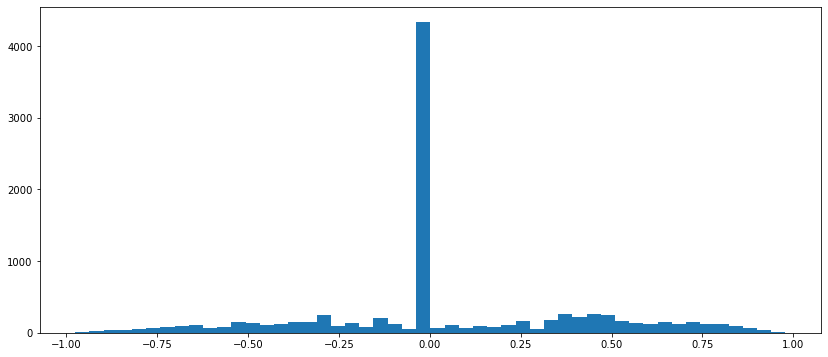

In [19]:
#Visualize Vader sentiment results
#To see what the overall sentiment is
plt.figure(figsize=(14,6))
plt.hist(sentences['compound'], bins=50);

> Data has a huge spike around the neural score of 0 corresponding to what we just saw with the positive, negative, and neutral sentences. We can also see we have more positive than negative scores, but both have a similar pattern. Most positive values range from 0.25 and 0.75; while most negative scores around -0.25 and -0.75.

### How to perform topic modeling
To see if there are any common topics in our novel.\
We shall need to perform a bit more cleaning to our text data to create a `corpus (collection of written text)` and a dictionary for our topic model.

In [20]:
#Convert sentence data to list
data = sentences['sentence'].values.tolist()
type(data)

list

In [21]:
#Text cleaning and tokenization using function
def text_processing(texts):
    #Remove numbers and alphanumerical words we don't need
    texts =  [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    #Tokenize & lowercase each word
    texts = [[word for word in text.lower().split()] for text in texts]
    #Stem each word
    #For example the word change, changed & changing will all become combined into one change word
    lmtzr = WordNetLemmatizer()
    texts = [[lmtzr.lemmatize(word) for word in text] for text in texts]
    #Remove stopwords
    stoplist = stopwords.words('english')
    texts = [[word for word in text if word not in stoplist] for text in texts]
    #Remove short words less than 3 letters in length
    texts = [[word for word in tokens if len(word) >= 3] for tokens in texts]
    return texts

In [22]:
#Apply function to process data and convert to dictionary
data = text_processing(data)
dictionary = Dictionary(data)
len(dictionary)

9740

> 9740 sentences left in our dictionary compared to initial 9979 sentences, a little bit shorter due to the text cleaning

In [23]:
#Create corpus for LDA analysis
#doc2bow method takes our text ensures each word is tokenized and normalized
corpus = [dictionary.doc2bow(text) for text in data]
len(corpus)

9979

We shall use `Latent Dirichlet Allocation` (LDA) topic modeling algorithm used to determine what topics are popular in a set of text. In order to do this analysis we need to determine the optimal number of topics.

-4.984662897641509
-5.250375826175895
-5.800019607177095
-6.505412042269931
-7.372759540523293
-7.921369820699965
-8.032078240220576


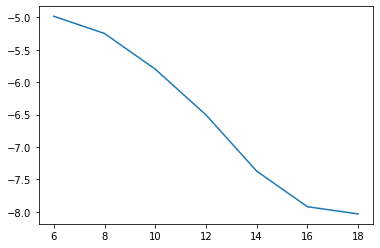

In [24]:
#Find optimal k value for the number of topics for our LDA analysis
np.random.seed(1) #Enables us get same outcome eachtime
k_range = range(6,20,2)
scores = []
for k in k_range:
    LdaModel = ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = k, passes = 20)
    cm = CoherenceModel(model= LdaModel, corpus = corpus, dictionary = dictionary, coherence = 'u_mass')
    print(cm.get_coherence())
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)

> x value denotes number of topics we are looking at with coherence value on the Y axis. Highest x value with our K is going to be circa 6, Generally we want to pick what the highest value is for our coherence score, So again we want to find 6 topics in our data. We shall proceed to create our final LDA model now that we know how many topics we need.

In [25]:
#Build LDA topic model
model = ldamodel.LdaModel(corpus, id2word = dictionary, num_topics = 6, passes = 20)

In [26]:
#Print topic distribution
model.show_topics()

[(0,
  '0.023*"miss" + 0.022*"joe" + 0.021*"pip" + 0.019*"havisham" + 0.019*"said" + 0.017*"come" + 0.013*"good" + 0.013*"old" + 0.011*"tell" + 0.009*"man"'),
 (1,
  '0.009*"time" + 0.008*"face" + 0.007*"little" + 0.007*"two" + 0.007*"looked" + 0.006*"could" + 0.006*"one" + 0.006*"saw" + 0.005*"old" + 0.005*"never"'),
 (2,
  '0.017*"yes" + 0.013*"gutenberg" + 0.011*"project" + 0.009*"one" + 0.008*"sir" + 0.006*"london" + 0.006*"hand" + 0.006*"jagger" + 0.006*"wemmick" + 0.006*"understand"'),
 (3,
  '0.015*"well" + 0.015*"would" + 0.012*"could" + 0.011*"said" + 0.010*"think" + 0.010*"done" + 0.010*"joe" + 0.007*"ever" + 0.007*"might" + 0.007*"must"'),
 (4,
  '0.046*"said" + 0.017*"know" + 0.014*"wemmick" + 0.013*"dear" + 0.012*"herbert" + 0.012*"would" + 0.011*"jagger" + 0.010*"say" + 0.010*"estella" + 0.010*"look"'),
 (5,
  '0.014*"hand" + 0.011*"work" + 0.009*"took" + 0.009*"went" + 0.008*"table" + 0.008*"upon" + 0.008*"little" + 0.007*"room" + 0.007*"put" + 0.006*"round"')]

**Higher value means Higher Relevancy**

## `Text Analysis on Great Expectations Novel`

In [27]:
#Bring in text file with our novel
textfile = open('sense_and_sensibility.txt', 'r', encoding = "utf8")
great_expect = textfile.read()

print(great_expect)

﻿The Project Gutenberg eBook of Sense and Sensibility, by Jane Austen

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Sense and Sensibility

Author: Jane Austen

Release Date: September, 1994 [eBook #161]
[Most recently updated: March 16, 2021]

Language: English

Character set encoding: UTF-8

Special thanks are due to Sharon Partridge for extensive proofreading and correction of this etext.

*** START OF THE PROJECT GUTENBERG EBOOK SENSE AND SENSIBILITY ***

[Illustration]




Sense and Sensibility

by Jane Austen

(1811)


Contents

 CHAPTER I
 CHAPTER II
 CHAPTER III
 CHAPTER IV
 CHAPT

In [28]:
#Lowercase words for word cloud
word_cloud_text = great_expect.lower()
#Remove numbers and alphanumeric words we don't need for word cloud
word_cloud_text = re.sub("[^a-zA-Z0-9]", " ", word_cloud_text)

In [29]:
#Tokenize the data to split it into words
tokens = word_tokenize(word_cloud_text)
#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
#Remove short words less than 3 letters in length
tokens = (word for word in tokens if len(word) >= 3)
#Add word cloud stopwords
stopwords_wc = set(stopwords.words("english"))

In [30]:
#Data cleaning to split data into sentences
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|edu|me)"
digits = "([0-9])"

text = " " + great_expect + "  "
text = text.replace("\n"," ")
text = re.sub(prefixes,"\\1<prd>",text)
text = re.sub(websites,"<prd>\\1",text)
text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
if "..." in text: text = text.replace("...","<prd><prd><prd>")
if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
if "”" in text: text = text.replace(".”","”.")
if "\"" in text: text = text.replace(".\"","\".")
if "!" in text: text = text.replace("!\"","\"!")
if "?" in text: text = text.replace("?\"","\"?")
text = text.replace(".",".<stop>")
text = text.replace("?","?<stop>")
text = text.replace("!","!<stop>")
text = text.replace("<prd>",".")
sentences = text.split("<stop>")
sentences = [s.strip() for s in sentences]
sentences = pd.DataFrame(sentences)
sentences.columns = ['sentence']

In [31]:
#Remove the first few rows of text that are irrelevant for analysis
sentences.drop(sentences.index[:59], inplace=True)
sentences = sentences.reset_index(drop=True)
sentences.head(10)

,sentence
0,"He really pressed them, with some earnestness,..."
1,A continuance in a place where everything remi...
2,"In seasons of cheerfulness, no temper could be..."
3,But in sorrow she must be equally carried away...
4,Mrs. John Dashwood did not at all approve of w...
5,To take three thousand pounds from the fortune...
6,She begged him to think again on the subject.
7,How could he answer it to himself to rob his c...
8,And what possible claim could the Miss Dashwoo...
9,It was very well known that no affection was e...


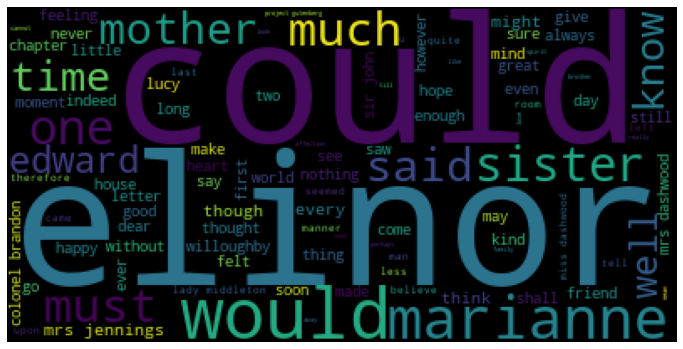

In [32]:
#Create word cloud with our text data

stopwords_wc = set(stopwords.words("english"))

wordcloud = WordCloud(max_words=100, stopwords=stopwords_wc, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### `Challenge: Analyze Sense and Sensibility`

In [33]:
#Create word frequency distribution
#Helps determine if book is appropriate to target audience
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'elinor': 685, 'could': 579, 'marianne': 566, 'mrs': 530, 'would': 515, 'said': 397, 'every': 376, 'one': 333, 'must': 293, 'much': 291, ...})

In [34]:
#View the 40 most common words in the text
fdist.most_common(40)

[('elinor', 685),
 ('could', 579),
 ('marianne', 566),
 ('mrs', 530),
 ('would', 515),
 ('said', 397),
 ('every', 376),
 ('one', 333),
 ('must', 293),
 ('much', 291),
 ('sister', 282),
 ('edward', 263),
 ('mother', 259),
 ('dashwood', 252),
 ('well', 240),
 ('time', 239),
 ('jennings', 235),
 ('know', 233),
 ('though', 216),
 ('willoughby', 216),
 ('might', 215),
 ('think', 210),
 ('miss', 210),
 ('may', 190),
 ('nothing', 189),
 ('never', 189),
 ('lucy', 186),
 ('thing', 184),
 ('without', 183),
 ('soon', 181),
 ('good', 178),
 ('see', 176),
 ('colonel', 176),
 ('ever', 169),
 ('john', 164),
 ('house', 160),
 ('little', 160),
 ('say', 160),
 ('first', 159),
 ('however', 156)]

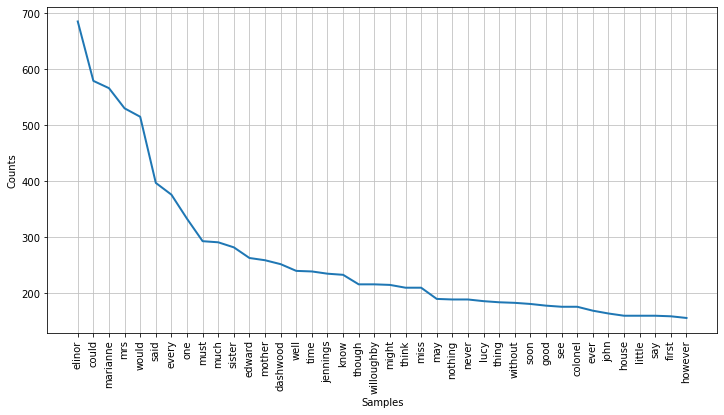

In [35]:
#Visualization of top 40 most common words in text
plt.figure(figsize=(12,6))
fdist.plot(40)
plt.show()

In [36]:
#Initialize Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [37]:
#Perfom Vader sentiment analysis
sentences['compound'] = [analyzer.polarity_scores(x)['compound'] for x in sentences['sentence']]
sentences['neg'] = [analyzer.polarity_scores(x)['neg'] for x in sentences['sentence']]
sentences['neu'] = [analyzer.polarity_scores(x)['neu'] for x in sentences['sentence']]
sentences['pos'] = [analyzer.polarity_scores(x)['pos'] for x in sentences['sentence']]
sentences.head(10)

,sentence,compound,neg,neu,pos
0,"He really pressed them, with some earnestness,...",-0.0258,0.052,0.898,0.050
1,A continuance in a place where everything remi...,0.5994,0.000,0.794,0.206
2,"In seasons of cheerfulness, no temper could be...",0.9117,0.123,0.468,0.409
3,But in sorrow she must be equally carried away...,0.0772,0.117,0.756,0.127
4,Mrs. John Dashwood did not at all approve of w...,0.0000,0.000,1.000,0.000
5,To take three thousand pounds from the fortune...,-0.1513,0.124,0.775,0.101
6,She begged him to think again on the subject.,0.0000,0.000,1.000,0.000
7,How could he answer it to himself to rob his c...,-0.5574,0.159,0.841,0.000
8,And what possible claim could the Miss Dashwoo...,0.1280,0.100,0.814,0.087
9,It was very well known that no affection was e...,-0.2893,0.165,0.691,0.144


In [38]:
#Get number of positive, neutral, and negative sentences
positive_sentence = sentences.loc[sentences['compound'] > 0]
negative_sentence = sentences.loc[sentences['compound'] < 0] 
neutral_sentence = sentences.loc[sentences['compound'] == 0]

print(sentences.shape)
print(len(positive_sentence))
print(len(negative_sentence))
print(len(neutral_sentence))

(5382, 5)
2494
1326
1562


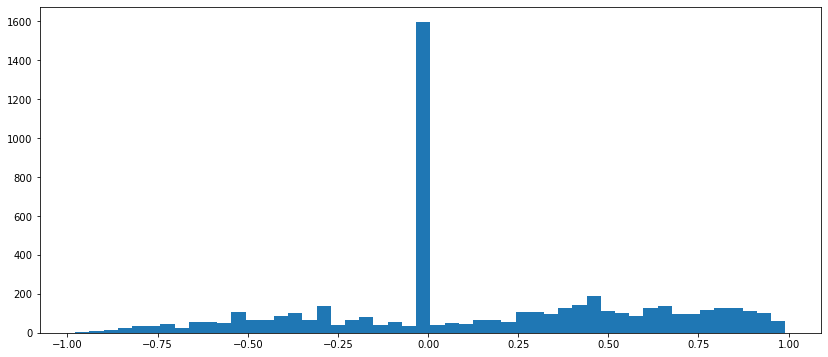

In [39]:
#Visualize Vader sentiment results
plt.figure(figsize=(14,6))
plt.hist(sentences['compound'], bins=50);

In [40]:
#Convert sentence data to list
data = sentences['sentence'].values.tolist()
type(data)

list

In [41]:
#Text cleaning and tokenization using function
def text_processing(texts):
    #Remove numbers and alphanumerical words we don't need
    texts =  [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    #Tokenize & lowercase each word
    texts = [[word for word in text.lower().split()] for text in texts]
    #Stem each word
    #For example the word change, changed & changing will all become combined into one change word
    lmtzr = WordNetLemmatizer()
    texts = [[lmtzr.lemmatize(word) for word in text] for text in texts]
    #Remove stopwords
    stoplist = stopwords.words('english')
    texts = [[word for word in text if word not in stoplist] for text in texts]
    #Remove short words less than 3 letters in length
    texts = [[word for word in tokens if len(word) >= 3] for tokens in texts]
    return texts

In [42]:
#Apply function to process data and convert to dictionary
data = text_processing(data)
dictionary = Dictionary(data)
len(dictionary)

5817

In [43]:
#Create corpus for LDA analysis
#doc2bow method takes our text ensures each word is tokenized and normalized
corpus = [dictionary.doc2bow(text) for text in data]
len(corpus)

5382

-5.258976525747929
-4.587124972679878
-5.115227338836731
-5.833997771412899
-6.078439992864092
-5.555232418623003
-7.39330893405059


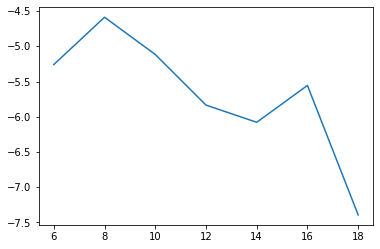

In [44]:
#Find optimal k value for the number of topics for our LDA analysis
np.random.seed(1) #Enables us get same outcome eachtime
k_range = range(6,20,2)
scores = []
for k in k_range:
    LdaModel = ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = k, passes = 20)
    cm = CoherenceModel(model= LdaModel, corpus = corpus, dictionary = dictionary, coherence = 'u_mass')
    print(cm.get_coherence())
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)

In [45]:
#Build LDA topic model
model = ldamodel.LdaModel(corpus, id2word = dictionary, num_topics = 6, passes = 20)

In [46]:
#Print topic distribution
model.show_topics()

[(0,
  '0.016*"every" + 0.011*"marianne" + 0.009*"one" + 0.008*"lady" + 0.008*"elinor" + 0.008*"could" + 0.007*"willoughby" + 0.007*"mother" + 0.006*"middleton" + 0.005*"though"'),
 (1,
  '0.014*"john" + 0.013*"house" + 0.012*"two" + 0.011*"day" + 0.010*"sir" + 0.010*"would" + 0.009*"year" + 0.008*"colonel" + 0.008*"time" + 0.008*"jennings"'),
 (2,
  '0.033*"elinor" + 0.026*"marianne" + 0.018*"said" + 0.012*"could" + 0.009*"much" + 0.008*"jennings" + 0.008*"edward" + 0.006*"cried" + 0.006*"heart" + 0.006*"hope"'),
 (3,
  '0.016*"elinor" + 0.012*"could" + 0.010*"would" + 0.010*"sister" + 0.010*"might" + 0.009*"much" + 0.008*"must" + 0.008*"marianne" + 0.007*"poor" + 0.007*"edward"'),
 (4,
  '0.017*"would" + 0.013*"well" + 0.012*"think" + 0.012*"know" + 0.011*"could" + 0.010*"miss" + 0.010*"say" + 0.009*"see" + 0.009*"ferrars" + 0.009*"soon"'),
 (5,
  '0.026*"gutenberg" + 0.025*"work" + 0.024*"project" + 0.011*"state" + 0.008*"chapter" + 0.007*"electronic" + 0.007*"may" + 0.007*"foundati